In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

In [ ]:

# read data into python as dataframe 
dataset = 'drive/My Drive/prac/Participants_Data_TGIH/Participants_Data_TGIH/Train.csv'
training_data = pd.read_csv(dataset)
training_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [ ]:

training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

[SHRIMPLIN, ALEXANDER D, SHANKLE, LUKE G U, KIMZEY A, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Categories (10, object): [SHRIMPLIN, ALEXANDER D, SHANKLE, LUKE G U, ..., NOLAN, Recruit F9, NEWBY,
                          CHURCHMAN BIBLE]

In [ ]:

facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [ ]:
training_data.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [ ]:
len(training_data['Country'].unique())

37

In [ ]:

# Get correlation
training_data.corr()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


In [ ]:
correct_facies_labels = training_data['Facies'].values
feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [ ]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

In [ ]:
X_train.size

15771

In [ ]:
y_train.size

2253

In [ ]:
blind.size

4980

In [ ]:
import itertools

In [ ]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

In [ ]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            total_correct += conf[i][j]
    return total_correct / sum(sum(conf))

In [ ]:
def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)

In [ ]:
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)

## **SVM**

In [ ]:

from sklearn import svm
SVM_model = svm.SVC(C=10, gamma=1)

In [ ]:

SVM_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:

yhat_SVM = SVM_model.predict(X_test)

In [ ]:
import itertools

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, yhat_SVM) 
print('Facies classification accuracy = %f' % accuracy(confusion_mtx))
display_cm(confusion_mtx, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.744681
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    42    10                                              52
     CSiS     6    83    23     1                       1         114
     FSiS     2    19    79     2     1     1           1         105
     SiSh                      29           6           2          37
       MS                       3    17     5           3          28
       WS                 2     3     7    75          11     2   100
        D           1     2           1          22     2     1    29
       PS                             7    12     2    53     2    76
       BS                 1                 1           1    20    23

Precision  0.84  0.73  0.74  0.76  0.52  0.75  0.92  0.72  0.80  0.75
   Recall  0.81  0.73  0.75  0.78  0.61  0.75  0.76  0.70  0.87  0.74
       F1  0.82  0.73  0.75  0.77  0.56  0.75  0.83  0.71  0.83  0.75


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(confusion_mtx, adjacent_facies))
display_adj_cm(confusion_mtx, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.927305
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    52                                                    52
     CSiS         112           1                       1         114
     FSiS     2          98     2     1     1           1         105
     SiSh                      29           6           2          37
       MS                            25                 3          28
       WS                 2     3          93                 2   100
        D           1     2           1          24           1    29
       PS                             7                69          76
       BS                 1                 1                21    23

Precision  0.96  0.99  0.95  0.83  0.74  0.92  1.00  0.91  0.88  0.93
   Recall  1.00  0.98  0.93  0.78  0.89  0.93  0.83  0.91  0.91  0.93
       F1  0.98  0.99  0.94  0.81  0.81  0.93  0.91  0.91  0.89  0.93


In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

jSVM = jaccard_similarity_score(y_test, yhat_SVM)
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM Jaccard index: %.3f" % jSVM )
print("SVM F1-score: %.3f" % f1SVM  )

SVM Jaccard index: 0.745
SVM F1-score: 0.746


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# **GPC**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

GPC_model = GaussianProcessClassifier().fit(X_train, y_train)

yhat_GPC = GPC_model.predict(X_test)

In [ ]:
jGPC = jaccard_similarity_score(y_test, yhat_GPC)
f1GPC = f1_score(y_test, yhat_GPC, average='weighted')

print("GPC Jaccard index: %.3f" % jGPC)
print("GPC F1-score: %.3f" % jGPC )

GPC Jaccard index: 0.663
GPC F1-score: 0.663


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_GPC = confusion_matrix(y_test, yhat_GPC)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_GPC))
display_cm(conf_GPC, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.663121
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    34    16     2                                        52
     CSiS     8    75    30                 1                     114
     FSiS     1    28    72     1     1     1           1         105
     SiSh                      25          10           2          37
       MS                            10    12     1     5          28
       WS                 1     3     7    71          16     2   100
        D           1                       1    20     5     2    29
       PS                       1     2    20     2    46     5    76
       BS                                   1           1    21    23

Precision  0.79  0.62  0.69  0.83  0.50  0.61  0.87  0.61  0.70  0.67
   Recall  0.65  0.66  0.69  0.68  0.36  0.71  0.69  0.61  0.91  0.66
       F1  0.72  0.64  0.69  0.75  0.42  0.65  0.77  0.61  0.79  0.66


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_GPC, adjacent_facies))
display_adj_cm(conf_GPC, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.930851
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    50           2                                        52
     CSiS         113                       1                     114
     FSiS     1         100     1     1     1           1         105
     SiSh                      25          10           2          37
       MS                            22           1     5          28
       WS                 1     3          94                 2   100
        D           1                            26           2    29
       PS                       1     2                73          76
       BS                                   1                22    23

Precision  0.98  0.99  0.97  0.83  0.88  0.88  0.96  0.90  0.85  0.93
   Recall  0.96  0.99  0.95  0.68  0.79  0.94  0.90  0.96  0.96  0.93
       F1  0.97  0.99  0.96  0.75  0.83  0.91  0.93  0.93  0.90  0.93


# **RANDOM FOREST CLASSIFIER**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=7).fit(X_train, y_train)


yhat_RFC = RFC_model.predict(X_test)


In [ ]:
jRFC  = jaccard_similarity_score(y_test, yhat_RFC)
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

print("RFC Jaccard index: %.3f" % jRFC )
print("RFC F1-score: %.3f" % f1RFC)

RFC Jaccard index: 0.679
RFC F1-score: 0.680


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_RFC = confusion_matrix(y_test, yhat_RFC)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_RFC))
display_cm(conf_RFC, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.679078
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    36    15     1                                        52
     CSiS     2    83    28                 1                     114
     FSiS     1    30    69     1     1                 3         105
     SiSh                      25     2     7           3          37
       MS                       3    13     6     1     5          28
       WS                 1     2     5    73     1    15     3   100
        D           1                 1     1    18     5     3    29
       PS                             5    25     1    45          76
       BS                                   1           1    21    23

Precision  0.92  0.64  0.70  0.81  0.48  0.64  0.86  0.58  0.78  0.69
   Recall  0.69  0.73  0.66  0.68  0.46  0.73  0.62  0.59  0.91  0.68
       F1  0.79  0.68  0.68  0.74  0.47  0.68  0.72  0.59  0.84  0.68


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_RFC, adjacent_facies))
display_adj_cm(conf_RFC, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.927305
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    51           1                                        52
     CSiS         113                       1                     114
     FSiS     1          99     1     1                 3         105
     SiSh                      27           7           3          37
       MS                            22           1     5          28
       WS                 1     2          94                 3   100
        D           1                 1          24           3    29
       PS                             5                71          76
       BS                                   1                22    23

Precision  0.98  0.99  0.98  0.90  0.76  0.91  0.96  0.87  0.79  0.93
   Recall  0.98  0.99  0.94  0.73  0.79  0.94  0.83  0.93  0.96  0.93
       F1  0.98  0.99  0.96  0.81  0.77  0.93  0.89  0.90  0.86  0.93


# **NEURAL NETWORK CLASSIFIER**

In [ ]:

from sklearn.neural_network import MLPClassifier


NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=8, hidden_layer_sizes=200).fit(X_train, y_train)

yhat_NNC = NNC_model.predict(X_test)


In [ ]:
jNNC  =  jaccard_similarity_score(y_test, yhat_NNC)
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

NNC Jaccard index: 0.699
NNC F1-score: 0.701


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
jNNC  =  jaccard_similarity_score(y_test, yhat_NNC)
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

NNC Jaccard index: 0.699
NNC F1-score: 0.701


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_NNC = confusion_matrix(y_test, yhat_NNC)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_NNC))
display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.698582
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    39     8     5                                        52
     CSiS     4    77    31           1                 1         114
     FSiS     1    16    84     1                       3         105
     SiSh                      26     2     5           4          37
       MS                       3    14     6           5          28
       WS                       1     5    65          26     3   100
        D           1                 2          18     6     2    29
       PS                             4    18     1    50     3    76
       BS                                   2                21    23

Precision  0.89  0.75  0.70  0.84  0.50  0.68  0.95  0.53  0.72  0.71
   Recall  0.75  0.68  0.80  0.70  0.50  0.65  0.62  0.66  0.91  0.70
       F1  0.81  0.71  0.75  0.76  0.50  0.66  0.75  0.58  0.81  0.70


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_NNC, adjacent_facies))
display_adj_cm(conf_NNC, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.927305
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    47           5                                        52
     CSiS         112                 1                 1         114
     FSiS     1         100     1                       3         105
     SiSh                      28           5           4          37
       MS                            23                 5          28
       WS                       1          96                 3   100
        D           1                 2          24           2    29
       PS                             4                72          76
       BS                                   2                21    23

Precision  0.98  0.99  0.95  0.93  0.77  0.93  1.00  0.85  0.81  0.93
   Recall  0.90  0.98  0.95  0.76  0.82  0.96  0.83  0.95  0.91  0.93
       F1  0.94  0.99  0.95  0.84  0.79  0.95  0.91  0.89  0.86  0.93


# **K NEIGHBOUR CLASSIFIER**

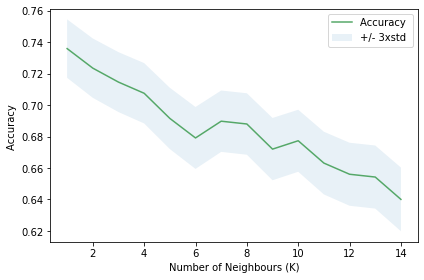

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus 
Ks =15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)
    
    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k = 5    #it seems 5 is good enough
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=50, p=1,  weights='distance' ).fit(X_train, y_train)
KNN_model
#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

yhat_KNN = KNN_model.predict(X_test)

In [ ]:
jKNN  = jaccard_similarity_score(y_test, yhat_KNN)
f1KNN = f1_score(y_test, yhat_KNN, average='weighted')
print("KNN Jaccard index: %.3f" % jKNN )
print("KNN F1-score: %.3f" % f1KNN  )

KNN Jaccard index: 0.716
KNN F1-score: 0.717


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_KNN = confusion_matrix(y_test, yhat_KNN)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_KNN))
display_cm(conf_KNN, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.716312
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    40    10     2                                        52
     CSiS     5    78    30     1                                 114
     FSiS     2    21    77     1     1     1           2         105
     SiSh                      27     1     7           2          37
       MS                       4    15     5           4          28
       WS                 1     3     5    73          15     3   100
        D           1                 1          24     2     1    29
       PS                            10    14     1    48     3    76
       BS                                               1    22    23

Precision  0.85  0.71  0.70  0.75  0.45  0.73  0.96  0.65  0.76  0.72
   Recall  0.77  0.68  0.73  0.73  0.54  0.73  0.83  0.63  0.96  0.72
       F1  0.81  0.70  0.72  0.74  0.49  0.73  0.89  0.64  0.85  0.72


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_KNN, adjacent_facies))
display_adj_cm(conf_KNN, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.923759
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    50           2                                        52
     CSiS         113           1                                 114
     FSiS     2          98     1     1     1           2         105
     SiSh                      28           7           2          37
       MS                            24                 4          28
       WS                 1     3          93                 3   100
        D           1                 1          26           1    29
       PS                            10                66          76
       BS                                                    23    23

Precision  0.96  0.99  0.97  0.85  0.67  0.92  1.00  0.89  0.85  0.93
   Recall  0.96  0.99  0.93  0.76  0.86  0.93  0.90  0.87  1.00  0.92
       F1  0.96  0.99  0.95  0.80  0.75  0.93  0.95  0.88  0.92  0.92


# **DECISION TREE CLASSIFIFER**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 25, min_samples_split=3 )
DT_model.fit(X_train,y_train)
DT_model

yhat_DT = DT_model.predict(X_test)

In [ ]:
jDT  = jaccard_similarity_score(y_test, yhat_DT)
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )

DT Jaccard index: 0.587
DT F1-score: 0.592


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_DT = confusion_matrix(y_test, yhat_DT)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_DT))
display_cm(conf_DT, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.586879
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    35    16     1                                        52
     CSiS     8    71    32     1     2                           114
     FSiS     1    31    67     1     2     1           2         105
     SiSh                      20     3     8     1     4     1    37
       MS           1           2    13     7     1     4          28
       WS                 2     3    18    50          22     5   100
        D           1     1     1     3     1    16     4     2    29
       PS                       1     6    26     2    40     1    76
       BS                                   1           3    19    23

Precision  0.80  0.59  0.65  0.69  0.28  0.53  0.80  0.51  0.68  0.60
   Recall  0.67  0.62  0.64  0.54  0.46  0.50  0.55  0.53  0.83  0.59
       F1  0.73  0.61  0.64  0.61  0.35  0.52  0.65  0.52  0.75  0.59


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_DT, adjacent_facies))
display_adj_cm(conf_DT, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.898936
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    51           1                                        52
     CSiS         111           1     2                           114
     FSiS     1          98     1     2     1           2         105
     SiSh                      23           8     1     4     1    37
       MS           1                22           1     4          28
       WS                 2     3          90                 5   100
        D           1     1     1     3          21           2    29
       PS                       1     6                69          76
       BS                                   1                22    23

Precision  0.98  0.98  0.96  0.77  0.63  0.90  0.91  0.87  0.73  0.90
   Recall  0.98  0.97  0.93  0.62  0.79  0.90  0.72  0.91  0.96  0.90
       F1  0.98  0.98  0.95  0.69  0.70  0.90  0.81  0.89  0.83  0.90


# **LOGISTIC REGRESSION CLASSIFIER**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1, max_iter=330).fit(X_train,y_train)
LR_model

yhat_LR = LR_model.predict(X_test)

In [ ]:
jLR  = jaccard_similarity_score(y_test, yhat_LR)
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR Jaccard index: %.3f" % jLR )
print("LR F1-score: %.3f" % f1LR )

LR Jaccard index: 0.589
LR F1-score: 0.577


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
conf_LR = confusion_matrix(y_test, yhat_LR)

In [ ]:
print('Facies classification accuracy = %f' % accuracy(conf_LR))
display_cm(conf_LR, facies_labels, hide_zeros=True, display_metrics=True)

Facies classification accuracy = 0.588652
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    36    16                                              52
     CSiS     8    82    22                 1           1         114
     FSiS     1    44    53     2     1     1     1     2         105
     SiSh                      18          18           1          37
       MS                       3     1    18     1     5          28
       WS                       3     2    71     3    20     1   100
        D                 1     3           3    15     6     1    29
       PS                       1     3    24     2    38     8    76
       BS                                   1           4    18    23

Precision  0.80  0.58  0.70  0.60  0.14  0.52  0.68  0.49  0.64  0.59
   Recall  0.69  0.72  0.50  0.49  0.04  0.71  0.52  0.50  0.78  0.59
       F1  0.74  0.64  0.59  0.54  0.06  0.60  0.59  0.50  0.71  0.58


In [ ]:
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf_LR, adjacent_facies))
display_adj_cm(conf_LR, facies_labels, adjacent_facies, hide_zeros=True, display_metrics=True)

Adjacent facies classification accuracy = 0.913121
     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    52                                                    52
     CSiS         112                       1           1         114
     FSiS     1          97     2     1     1     1     2         105
     SiSh                      18          18           1          37
       MS                            22           1     5          28
       WS                       3          96                 1   100
        D                 1     3                24           1    29
       PS                       1     3                72          76
       BS                                   1                22    23

Precision  0.98  1.00  0.99  0.67  0.85  0.82  0.92  0.89  0.92  0.91
   Recall  1.00  0.98  0.92  0.49  0.79  0.96  0.83  0.95  0.96  0.91
       F1  0.99  0.99  0.96  0.56  0.81  0.88  0.87  0.92  0.94  0.91


In [ ]:
acc_LR = accuracy(conf_LR)

In [ ]:
print(acc_LR)

0.5886524822695035


# **OBSERVATIONS**

In [ ]:
# create dictionary with calculated errors as variables
data_frame1 ={'Model type': ['SVM', 'GPC', 'RFC', 'NNC', 'KNN', 'DT', 'LR'],
       'Jaccard index': [jSVM, jGPC, jRFC, jNNC, jKNN, jDT, jLR],
       'F1-Score': [f1SVM, f1GPC, f1RFC, f1NNC, f1KNN, f1DT, f1LR],
       'Accuracy': [accuracy(confusion_mtx), accuracy(conf_GPC), accuracy(conf_RFC), accuracy(conf_NNC), accuracy(conf_KNN), accuracy(conf_DT),
                    accuracy(conf_LR)],
        'Adjacent Accuracy': [accuracy_adjacent(confusion_mtx, adjacent_facies), accuracy_adjacent(conf_GPC, adjacent_facies), accuracy_adjacent(conf_RFC, adjacent_facies),
                                     accuracy_adjacent(conf_NNC, adjacent_facies), accuracy_adjacent(conf_KNN, adjacent_facies), accuracy_adjacent(conf_DT, adjacent_facies),accuracy_adjacent(conf_LR, adjacent_facies)]
            }
df1 = pd.DataFrame(data_frame1, columns = ['Model type','Jaccard index','F1-Score', 'Accuracy', 'Adjacent Accuracy' ] )
df1.round(2)

,Model type,Jaccard index,F1-Score,Accuracy,Adjacent Accuracy
0,SVM,0.74,0.75,0.74,0.93
1,GPC,0.66,0.66,0.66,0.93
2,RFC,0.68,0.68,0.68,0.93
3,NNC,0.70,0.70,0.70,0.93
4,KNN,0.72,0.72,0.72,0.92
5,DT,0.59,0.59,0.59,0.90
6,LR,0.59,0.58,0.59,0.91


In [ ]:

y_blind = blind['Facies'].values

In [ ]:
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [ ]:

X_blind = scaler.transform(blind_features)

In [ ]:
#SVM
yhat_blind_SVM = SVM_model.predict(X_blind)
blind['SVM_Pred'] = yhat_blind_SVM
conf_blind_SVM = confusion_matrix(y_blind, yhat_blind_SVM)

#GPC
yhat_blind_GPC = GPC_model.predict(X_blind)
blind['GPC_Pred'] = yhat_blind_GPC
conf_blind_GPC = confusion_matrix(y_blind, yhat_blind_GPC)

#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC
conf_blind_RFC = confusion_matrix(y_blind, yhat_blind_RFC)

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC
conf_blind_NNC = confusion_matrix(y_blind, yhat_blind_NNC)

#KNN
yhat_blind_KNN = KNN_model.predict(X_blind)
blind['KNN_Pred'] = yhat_blind_KNN
conf_blind_KNN = confusion_matrix(y_blind, yhat_blind_KNN)

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT
conf_blind_DT = confusion_matrix(y_blind, yhat_blind_DT)

#LR
yhat_blind_LR = LR_model.predict(X_blind)
blind['LR_Pred'] = yhat_blind_LR
conf_blind_LR = confusion_matrix(y_blind, yhat_blind_LR)

In [ ]:
#SVM
jSVM_b =  jaccard_similarity_score(y_blind, yhat_blind_SVM)
f1SVM_b = f1_score(y_blind, yhat_blind_SVM, average='weighted')
print("SVM Jaccard index for blind well prediction: %.3f" %jSVM_b)
print("SVM F1-score for blind well prediction: %.3f" %f1SVM_b )

#GPC
jGPC_b =jaccard_similarity_score(y_blind, yhat_blind_GPC)
f1GPC_b =f1_score(y_blind, yhat_blind_GPC, average='weighted')
print("GPC Jaccard index for blind well prediction: %.3f" %jGPC_b )
print("GPC F1-score for blind well prediction: %.3f" % f1GPC_b)

#RFC
jRFC_b =jaccard_similarity_score(y_blind, yhat_blind_RFC)
f1RFC_b=f1_score(y_blind, yhat_blind_RFC, average='weighted')
print("RFC Jaccard index for blind well prediction: %.3f" % jRFC_b)
print("RFC F1-score for blind well prediction: %.3f" % f1RFC_b)

#NNC
jNNC_b  =jaccard_similarity_score(y_blind, yhat_blind_NNC)
f1NNC_b =f1_score(y_blind, yhat_blind_NNC, average='weighted')
print("NNC Jaccard index for blind well prediction: %.3f" %jNNC_b )
print("NNC F1-score for blind well prediction: %.3f" %f1NNC_b )

#KNN
jKNN_b = jaccard_similarity_score(y_blind, yhat_blind_KNN)
f1KNN_b = f1_score(y_blind, yhat_blind_KNN, average='weighted')
print("KNN Jaccard index for blind well prediction: %.3f" % jKNN_b)
print("KNN F1-score for blind well prediction: %.3f" %f1KNN_b  )

#DT
jDT_b = jaccard_similarity_score(y_blind, yhat_blind_DT)
f1DT_b =f1_score(y_blind, yhat_blind_DT, average='weighted')
print("DT Jaccard index for blind well prediction: %.3f" % jDT_b)
print("DT F1-score for blind well prediction: %.3f" % f1DT_b )

#LR
jLR_b  = jaccard_similarity_score(y_blind, yhat_blind_LR)
f1LR_b = f1_score(y_blind, yhat_blind_LR, average='weighted')
print("LR Jaccard index for blind well prediction: %.3f" % jLR_b)
print("LR F1-score for blind well prediction: %.3f" %f1LR_b )

SVM Jaccard index for blind well prediction: 0.458
SVM F1-score for blind well prediction: 0.489
GPC Jaccard index for blind well prediction: 0.470
GPC F1-score for blind well prediction: 0.500
RFC Jaccard index for blind well prediction: 0.487
RFC F1-score for blind well prediction: 0.520
NNC Jaccard index for blind well prediction: 0.504
NNC F1-score for blind well prediction: 0.531
KNN Jaccard index for blind well prediction: 0.460
KNN F1-score for blind well prediction: 0.507
DT Jaccard index for blind well prediction: 0.427
DT F1-score for blind well prediction: 0.470
LR Jaccard index for blind well prediction: 0.460
LR F1-score for blind well prediction: 0.481


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
data_frame2 ={'Model type': ['SVM', 'GPC', 'RFC', 'NNC', 'KNN', 'DT', 'LR'],
       'Jaccard index': [jSVM_b, jGPC_b, jRFC_b, jNNC_b, jKNN_b, jDT_b, jLR_b],
       'F1-Score': [f1SVM_b, f1GPC_b, f1RFC_b, f1NNC_b, f1KNN_b, f1DT_b, f1LR_b],
       'Accuracy': [accuracy(conf_blind_SVM), accuracy(conf_blind_GPC), accuracy(conf_blind_RFC), accuracy(conf_blind_NNC), accuracy(conf_blind_KNN),
                    accuracy(conf_blind_DT),accuracy(conf_blind_LR)],
        'Adjacent Accuracy': [accuracy_adjacent(conf_blind_SVM, adjacent_facies), accuracy_adjacent(conf_blind_GPC, adjacent_facies), 
                              accuracy_adjacent(conf_blind_RFC, adjacent_facies),accuracy_adjacent(conf_blind_NNC, adjacent_facies), 
                              accuracy_adjacent(conf_blind_KNN, adjacent_facies), accuracy_adjacent(conf_blind_DT, adjacent_facies),
                              accuracy_adjacent(conf_blind_LR, adjacent_facies)]
            }
df2 = pd.DataFrame(data_frame2, columns = ['Model type','Jaccard index','F1-Score', 'Accuracy', 'Adjacent Accuracy' ] )
df2.round(2)

,Model type,Jaccard index,F1-Score,Accuracy,Adjacent Accuracy
0,SVM,0.46,0.49,0.46,0.81
1,GPC,0.47,0.50,0.47,0.83
2,RFC,0.49,0.52,0.49,0.84
3,NNC,0.50,0.53,0.50,0.86
4,KNN,0.46,0.51,0.46,0.84
5,DT,0.43,0.47,0.43,0.83
6,LR,0.46,0.48,0.46,0.86


In [ ]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    

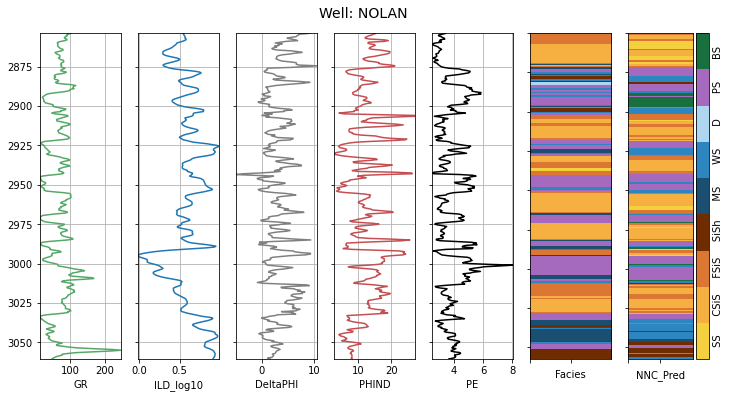

In [ ]:
#let's plot KNN result
compare_facies_plot(blind, 'NNC_Pred', facies_colors)
#plt.savefig("drive/My Drive/seminar/NNC_comp.png", dpi=400)

In [ ]:

def compare_all_facies(logs, Pred1, Pred2, Pred3, Pred4, Pred5, Pred6, Pred7, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[Pred4].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[Pred5].values,1), 100, 1)
    cluster7 = np.repeat(np.expand_dims(logs[Pred6].values,1), 100, 1)
    cluster8 = np.repeat(np.expand_dims(logs[Pred7].values,1), 100, 1)

   
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(12, 6))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im5 = ax[4].imshow(cluster5, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im6 = ax[5].imshow(cluster6, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im7 = ax[6].imshow(cluster7, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im8 = ax[7].imshow(cluster8, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
       
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im8, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred1); ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3); ax[4].set_xlabel(Pred4); ax[5].set_xlabel(Pred5)
    ax[6].set_xlabel(Pred6); ax[7].set_xlabel(Pred7)
    
    #ax[0].set_yticklabels([]) ;
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]) 
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([])
    ax[3].set_xticklabels([]); ax[4].set_xticklabels([]); ax[5].set_xticklabels([])
    ax[6].set_xticklabels([]); ax[7].set_xticklabels([])

    f.suptitle('Various model predictions in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

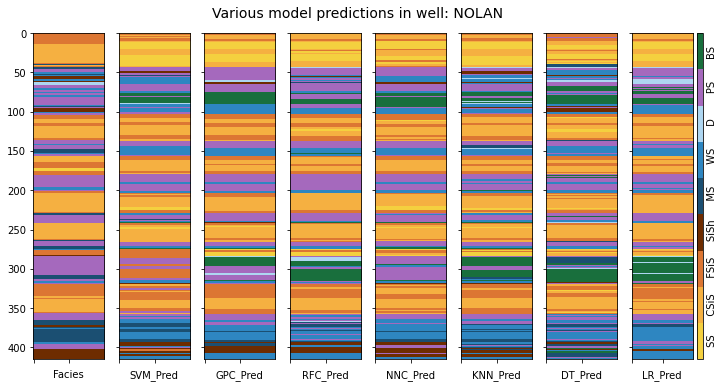

In [ ]:

compare_all_facies(blind,'SVM_Pred','GPC_Pred','RFC_Pred', 'NNC_Pred', 'KNN_Pred','DT_Pred', 'LR_Pred', facies_colors)
#plt.savefig("drive/My Drive/seminar/Compo.png", dpi=400)

# **NEW DATA**

In [ ]:
well_data = pd.read_csv('drive/My Drive/seminar/validation_data_nofacies.csv')
well_data['Well Name'] = well_data['Well Name'].astype('category')
well_features = well_data.drop(['Formation', 'Well Name', 'Depth'], axis=1)

In [ ]:
X_unknown = scaler.transform(well_features)

In [ ]:

#predict facies of unclassified data
y_unknown = NNC_model.predict(X_unknown)
well_data['Facies'] = y_unknown
well_data

,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,A1 SH,STUART,2808.0,66.276,0.630,3.300,10.650,3.591,1,1.000,3
1,A1 SH,STUART,2808.5,77.252,0.585,6.500,11.950,3.341,1,0.978,3
2,A1 SH,STUART,2809.0,82.899,0.566,9.400,13.600,3.064,1,0.956,2
3,A1 SH,STUART,2809.5,80.671,0.593,9.500,13.250,2.977,1,0.933,3
4,A1 SH,STUART,2810.0,75.971,0.638,8.700,12.350,3.020,1,0.911,3
...,...,...,...,...,...,...,...,...,...,...,...
825,C SH,CRAWFORD,3158.5,86.078,0.554,5.040,16.150,3.161,1,0.639,3
826,C SH,CRAWFORD,3159.0,88.855,0.539,5.560,16.750,3.118,1,0.611,2
827,C SH,CRAWFORD,3159.5,90.490,0.530,6.360,16.780,3.168,1,0.583,2
828,C SH,CRAWFORD,3160.0,90.975,0.522,7.035,16.995,3.154,1,0.556,2


In [ ]:
well_data['Well Name'].unique()

[STUART, CRAWFORD]
Categories (2, object): [STUART, CRAWFORD]

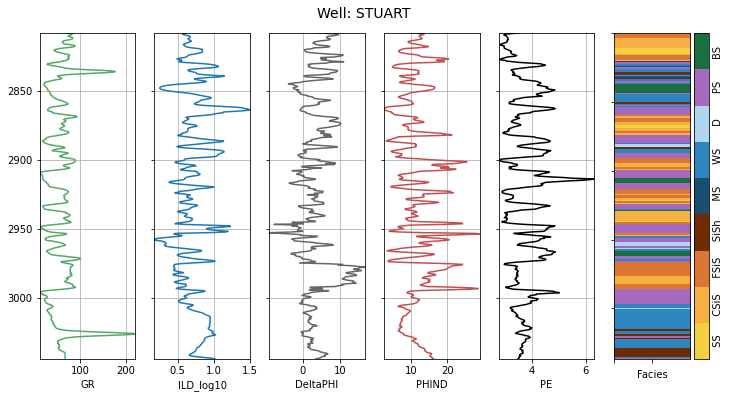

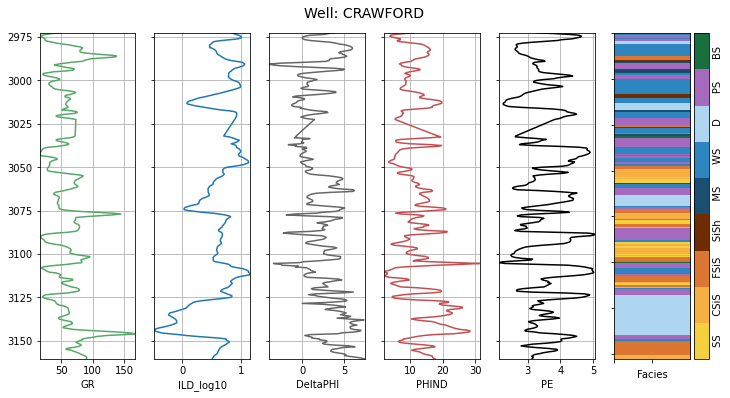

In [ ]:
make_facies_log_plot(
    well_data[well_data['Well Name'] == 'STUART'],
    facies_colors=facies_colors)
#plt.savefig("drive/My Drive/seminar/stuart.png", dpi=400)

make_facies_log_plot(
    well_data[well_data['Well Name'] == 'CRAWFORD'],
    facies_colors=facies_colors)

#plt.savefig("drive/My Drive/seminar/crawford.png", dpi=400)

In [ ]:
#well_data.to_csv('drive/My Drive/seminar/predict_facies.csv')